In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import sqlite3
from matplotlib.patches import Circle
import itertools
from sklearn.inspection import permutation_importance
from matplotlib.patches import FancyBboxPatch
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from graphviz import Digraph
from IPython.display import Image
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.impute import SimpleImputer
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%ls
%pwd

drive/  sample_data/


'/content'

In [3]:
found_file = False
# Propp's
try:
  with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
    print("found file")
    found_file = True
except FileNotFoundError:
  pass
# Eli
if(not found_file):
  try:
    with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass
# Sabina
if(not found_file):
  try:
    with open('/content/drive/MyDrive/soccer database/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass

if(not found_file):
  print("Failed to find file in google drive")

found file


In [4]:
from sqlite3.dbapi2 import OperationalError
open_file = False
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite')
    open_file = True
  except OperationalError:
    pass
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/soccer database/database.sqlite')
    open_file = True
  except OperationalError:
    pass




matches = pd.read_sql_query("SELECT * FROM Match",con)

players = pd.read_sql("SELECT * FROM Player;", con)

teams = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [5]:
binary_class_label = "home_team_win"
binary_class_label_complement = "away_team_win"
matches[binary_class_label] = np.where(matches["home_team_goal"] - matches["away_team_goal"] > 0, 1, 0)
matches[binary_class_label_complement] = np.where(matches["home_team_win"] == 0, 1, 0)

In [6]:
num_home_wins = np.count_nonzero(matches["home_team_win"] == 1)
print(f"Percentage of home wins: {round(num_home_wins / matches.shape[0] * 100, 2)}%")

Percentage of home wins: 45.87%


In [7]:
matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win,away_team_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [8]:
odds_features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
odds_data = matches[odds_features + [binary_class_label]].dropna()

odds_data

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win
997,2.38,3.25,3.00,2.45,3.30,2.70,2.30,3.1,2.60,2.38,...,2.40,3.40,2.90,2.45,3.30,2.70,2.40,3.25,2.70,0
998,1.80,3.60,4.33,1.75,3.70,4.20,1.80,3.2,3.70,1.73,...,1.80,3.60,4.50,1.75,3.70,4.20,1.80,3.50,4.00,1
999,1.65,3.80,5.00,1.67,3.60,5.00,1.65,3.3,4.40,1.67,...,1.70,3.70,5.00,1.67,3.60,5.00,1.70,3.50,4.50,0
1000,1.50,4.00,7.00,1.53,3.90,6.00,1.50,3.7,5.00,1.50,...,1.57,3.90,6.00,1.53,3.90,6.00,1.50,3.80,6.00,1
1001,1.29,5.25,10.00,1.25,5.50,10.00,1.25,4.5,9.00,1.25,...,1.25,5.50,12.00,1.25,5.50,10.00,1.25,5.50,9.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,2.00,3.40,3.75,2.00,3.20,3.90,1.85,3.5,3.95,1.90,...,2.05,3.50,3.90,2.00,3.20,3.90,2.00,3.40,3.50,1
23413,3.00,3.25,2.38,3.30,3.20,2.35,2.90,3.3,2.30,2.88,...,3.20,3.40,2.38,3.30,3.20,2.35,2.88,3.30,2.38,1
23414,8.00,4.50,1.40,8.75,4.75,1.40,7.60,4.8,1.35,8.00,...,9.00,5.25,1.36,8.75,4.75,1.40,8.50,4.50,1.36,0
23415,1.91,3.50,4.00,1.90,3.40,4.00,2.00,3.3,3.60,1.95,...,1.95,3.60,4.20,1.90,3.40,4.00,1.91,3.50,3.75,0


In [9]:
X = odds_data.drop('home_team_win', axis=1)
y = odds_data['home_team_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, activation='relu', solver='adam', random_state=1)
nn.fit(X_train, y_train)
print("Training set score: %f" % nn.score(X_train, y_train))
print("Test set score: %f" % nn.score(X_test, y_test))

Training set score: 0.645191
Test set score: 0.670290


In [10]:
y_pred_nn = nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)

Accuracy: 0.6702898550724637


In [11]:
def ann_viz(model, view=True, filename="network.gv", title="My Neural Network", max_nodes_per_layer=10, edge_thickness=1.0):

    if not hasattr(model, 'coefs_'):
        raise ValueError("Model does not appear to be fitted yet. Please train it before trying to visualize.")

    dot = Digraph(comment=title)

    dot.attr('node', shape='circle', style='filled', fillcolor='#E0E0E0')
    dot.attr(rankdir='LR')
    dot.attr('edge', style='solid', color='gray', penwidth=str(edge_thickness))

    input_layer = min(model.coefs_[0].shape[0], max_nodes_per_layer)
    for i in range(input_layer):
        dot.node('I{}'.format(i), 'Input\n{}'.format(i + 1))

    last_layer = 'I'
    for i, (layer_weights, layer_intercepts) in enumerate(zip(model.coefs_, model.intercepts_)):
        layer_type = 'H' if i < len(model.coefs_) - 1 else 'O'
        layer_size = min(layer_weights.shape[1], max_nodes_per_layer)
        for j in range(layer_size):
            node_label = '{}{}'.format(layer_type, j)
            dot.node(node_label, '{}\n{}'.format('Hidden' if layer_type == 'H' else 'Output', j + 1))
            prev_layer_size = min(model.coefs_[i - 1].shape[0] if i > 0 else model.coefs_[0].shape[0], max_nodes_per_layer)
            for k in range(prev_layer_size):
                prev_node_label = '{}{}'.format(last_layer, k)
                dot.edge(prev_node_label, node_label)
        last_layer = layer_type

    dot.render(filename, view=view)
    return dot



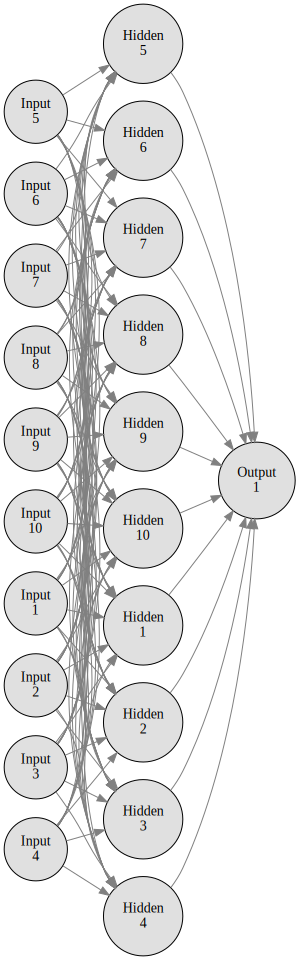

In [12]:
ann_viz(nn)

In [13]:
#Optimization
parameter_space = {
    'hidden_layer_sizes': [(randint.rvs(10, 100), randint.rvs(10, 100)), (randint.rvs(10, 100),)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': (0.0001, 0.05),
    'learning_rate': ['constant', 'adaptive'],
}

clf = GridSearchCV(nn, parameter_space, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (13, 69), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [14]:
y_true, y_pred = y_test , clf.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       326
           1       0.62      0.42      0.50       226

    accuracy                           0.66       552
   macro avg       0.65      0.62      0.62       552
weighted avg       0.65      0.66      0.64       552



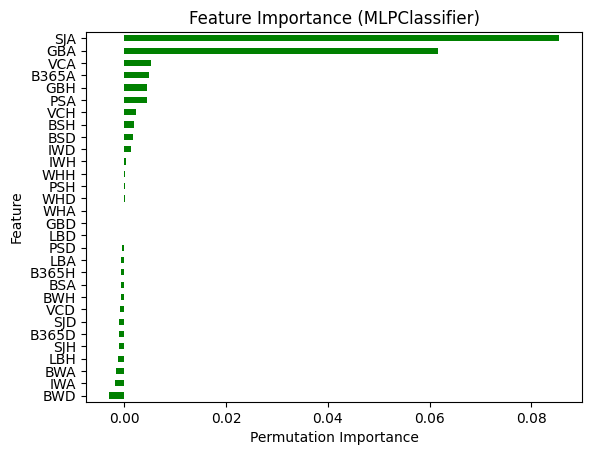

In [15]:
perm_importance = permutation_importance(nn, X_test, y_test, n_repeats=30, random_state=0)


feature_importances = pd.Series(perm_importance.importances_mean, index=X_train.columns)


feature_importances_sorted = feature_importances.sort_values()

feature_importances_sorted.plot.barh(color='green')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (MLPClassifier)")
plt.show()

In [16]:
most_important = ["SJA", "GBA", "PSA"]
better_odds_data = matches[most_important + [binary_class_label]].dropna()
new_nn = nn
X_train, X_test, y_train, y_test = train_test_split(better_odds_data[most_important], better_odds_data["home_team_win"], test_size=0.2)
for i in range(10):
  new_nn.fit(X_train, y_train)
  score = new_nn.score(X_test, y_test)
  print(score)
print(new_nn.score(X_test, y_test))
print(new_nn.score(X_test, y_test))
y_pred = new_nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Training set score: %f" % new_nn.score(X_train, y_train))
print("Test set score: %f" % nn.score(X_test, y_test))
print("Accuracy:", accuracy)

0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
Training set score: 0.651939
Test set score: 0.666667
Accuracy: 0.6666666666666666


In [17]:
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [18]:
buildup_features = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing"]
chance_creation_features = ["chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting"]
defence_features = ["defencePressure", "defenceAggression", "defenceTeamWidth"]
categories = [buildup_features, chance_creation_features, defence_features]

aggregations = ["mean", "min", "max", "median"]

all_attr_features = []
for category in categories:
    all_attr_features += category

all_attr_features_agg = []
categories_agg = []
for category in categories:
    category_agg = []
    for agg in aggregations:
        for feature in category:
            formatted_feature_name = f"{feature}_{agg}"
            category_agg.append(formatted_feature_name)
            all_attr_features_agg.append(formatted_feature_name)
    categories_agg.append(category_agg)

len(all_attr_features_agg)

36

In [19]:
aggregated_attributes = team_attributes.groupby("team_api_id").agg(
    {feature : [(f"{feature}_{agg}", agg) for agg in aggregations]for feature in all_attr_features}
).reset_index(col_level = 1).droplevel(level = 0, axis = 1)[["team_api_id"] + all_attr_features_agg]

aggregated_attributes.head()

,team_api_id,buildUpPlaySpeed_mean,buildUpPlayDribbling_mean,buildUpPlayPassing_mean,buildUpPlaySpeed_min,buildUpPlayDribbling_min,buildUpPlayPassing_min,buildUpPlaySpeed_max,buildUpPlayDribbling_max,buildUpPlayPassing_max,...,defenceTeamWidth_mean,defencePressure_min,defenceAggression_min,defenceTeamWidth_min,defencePressure_max,defenceAggression_max,defenceTeamWidth_max,defencePressure_median,defenceAggression_median,defenceTeamWidth_median
0,1601,47.333333,48.0,46.166667,30,48.0,38,53,48.0,55,...,49.333333,43,44,49,65,60,50,43.0,44.0,49.0
1,1773,52.000000,51.0,50.000000,52,51.0,50,52,51.0,50,...,50.000000,43,44,50,43,44,50,43.0,44.0,50.0
2,1957,47.166667,54.0,52.666667,30,54.0,38,66,54.0,69,...,53.666667,32,50,49,70,70,70,48.5,56.0,51.0
3,2033,49.000000,62.0,48.400000,45,62.0,40,65,62.0,55,...,45.400000,37,24,35,50,45,60,37.0,31.0,44.0
4,2182,60.333333,52.5,49.000000,40,50.0,35,67,55.0,57,...,54.500000,47,37,45,60,58,63,48.5,47.0,55.5


In [20]:
def attribute_matchup(dataset, home_id, away_id):
    """
    Computes the matchup features for the home_id and away_id.
    """
    home = dataset[dataset["team_api_id"] == home_id][all_attr_features_agg].to_numpy()
    away = dataset[dataset["team_api_id"] == away_id][all_attr_features_agg].to_numpy()
    if len(home) == 0 or len(away) == 0:
        # Team not present, no matchup possible
        return pd.Series([np.nan] * len(all_attr_features_agg), index = all_attr_features_agg)
    diff = (home - away)[0]
    return pd.Series(diff, index = all_attr_features_agg)

In [21]:
attr_data = matches.copy()
attr_data[all_attr_features_agg] = attr_data.apply(lambda x: attribute_matchup(aggregated_attributes, x["home_team_api_id"], x["away_team_api_id"]), axis = 1, result_type = "expand")

In [22]:
attr_data = attr_data.dropna()

In [23]:
attr_data[all_attr_features_agg]

,buildUpPlaySpeed_mean,buildUpPlayDribbling_mean,buildUpPlayPassing_mean,buildUpPlaySpeed_min,buildUpPlayDribbling_min,buildUpPlayPassing_min,buildUpPlaySpeed_max,buildUpPlayDribbling_max,buildUpPlayPassing_max,buildUpPlaySpeed_median,...,defenceTeamWidth_mean,defencePressure_min,defenceAggression_min,defenceTeamWidth_min,defencePressure_max,defenceAggression_max,defenceTeamWidth_max,defencePressure_median,defenceAggression_median,defenceTeamWidth_median
3248,-4.666667,13.0,-29.666667,-18.0,18.0,-25.0,8.0,8.0,-30.0,0.5,...,-1.333333,-5.0,2.0,10.0,17.0,-13.0,-13.0,5.0,-8.5,1.0
3249,4.500000,1.5,6.666667,5.0,0.0,2.0,-9.0,3.0,11.0,13.0,...,1.500000,0.0,3.0,0.0,1.0,17.0,-5.0,7.5,8.5,3.5
3250,-3.833333,1.0,-8.166667,3.0,6.0,-7.0,-10.0,-4.0,0.0,-4.0,...,-4.666667,-5.0,-11.0,-3.0,-15.0,-31.0,-8.0,-1.5,-11.5,-6.0
3251,4.000000,-1.0,-0.166667,-11.0,4.0,-8.0,0.0,-6.0,5.0,9.5,...,2.833333,-1.0,1.0,1.0,-5.0,-5.0,-16.0,-7.0,-12.5,10.0
3252,7.500000,-1.5,9.333333,13.0,-2.0,9.0,0.0,-1.0,17.0,11.0,...,-6.666667,11.0,-1.0,-8.0,-7.0,4.0,-9.0,-9.0,-4.0,-5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,2.100000,-12.5,12.266667,-18.0,-14.0,-7.0,11.0,-11.0,6.0,5.0,...,-13.466667,-18.0,-12.0,-20.0,-7.0,3.0,-12.0,-7.0,4.5,-12.0
23413,-17.833333,-3.0,-22.500000,0.0,-5.0,-7.0,-16.0,-1.0,-15.0,-25.0,...,-4.500000,0.0,-18.0,-10.0,-9.0,-24.0,-7.0,9.5,-4.5,0.0
23414,5.500000,-2.5,14.666667,-5.0,-1.0,10.0,7.0,-4.0,11.0,10.0,...,-9.500000,6.0,0.0,-10.0,-9.0,-12.0,-12.0,8.5,-11.0,-9.0
23415,-2.500000,1.5,6.833333,5.0,-1.0,0.0,-1.0,4.0,15.0,-3.0,...,1.166667,0.0,-5.0,2.0,10.0,5.0,-1.0,-3.0,2.0,3.0


In [24]:
attr_data[binary_class_label]

3248     0
3249     1
3250     1
3251     1
3252     1
        ..
23412    1
23413    1
23414    0
23415    0
23416    0
Name: home_team_win, Length: 1762, dtype: int64

In [25]:
attr_nn = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(attr_data[all_attr_features_agg], attr_data[binary_class_label], test_size=0.2)
#Optimization
parameter_space = {
    'hidden_layer_sizes': [(randint.rvs(10, 100), randint.rvs(10, 100)), (randint.rvs(10, 100),)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': (0.0001, 0.05),
    'learning_rate': ['constant', 'adaptive'],
}

clf = GridSearchCV(attr_nn, parameter_space, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (52,), 'learning_rate': 'constant', 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
y_true, y_pred = y_test , clf.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       187
           1       0.55      0.53      0.54       166

    accuracy                           0.58       353
   macro avg       0.57      0.57      0.57       353
weighted avg       0.57      0.58      0.57       353



In [27]:
attr_nn = MLPClassifier(hidden_layer_sizes=[40,40,40,40,40], activation="tanh", solver="adam", max_iter= 1000, early_stopping=True)
attr_nn.fit(X_train, y_train)
trainscore = attr_nn.score(X_train, y_train)
testscore = attr_nn.score(X_test, y_test)

y_pred = attr_nn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Trainscore: %f" % trainscore)
print("TestScore: %f" % testscore)

Trainscore: 0.718240
TestScore: 0.617564


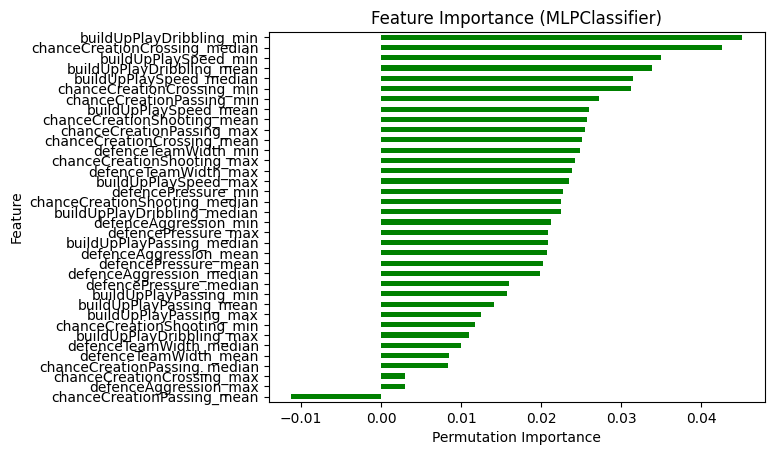

In [28]:
perm_importance = permutation_importance(attr_nn, X_test, y_test, n_repeats=30, random_state=0)


feature_importances = pd.Series(perm_importance.importances_mean, index=X_train.columns)


feature_importances_sorted = feature_importances.sort_values()

feature_importances_sorted.plot.barh(color='green')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (MLPClassifier)")
plt.show()

In [29]:
feature_importances_sorted[16:36]

defencePressure_max              0.020869
defenceAggression_min            0.021246
buildUpPlayDribbling_median      0.022474
chanceCreationShooting_median    0.022474
defencePressure_min              0.022757
buildUpPlaySpeed_max             0.023418
defenceTeamWidth_max             0.023890
chanceCreationShooting_max       0.024174
defenceTeamWidth_min             0.024835
chanceCreationCrossing_mean      0.025118
chanceCreationPassing_max        0.025496
chanceCreationShooting_mean      0.025779
buildUpPlaySpeed_mean            0.025968
chanceCreationPassing_min        0.027290
chanceCreationCrossing_min       0.031256
buildUpPlaySpeed_median          0.031539
buildUpPlayDribbling_mean        0.033900
buildUpPlaySpeed_min             0.034939
chanceCreationCrossing_median    0.042587
buildUpPlayDribbling_min         0.045137
dtype: float64

In [30]:
key_features = ["buildUpPlayDribbling_median", "buildUpPlayPassing_max", "buildUpPlayPassing_median", "chanceCreationPassing_mean", "buildUpPlaySpeed_median", "buildUpPlayPassing_min", "chanceCreationCrossing_median", "chanceCreationPassing_median", "chanceCreationPassing_max", "chanceCreationPassing_min", "buildUpPlayDribbling_mean", "chanceCreationShooting_max", "buildUpPlayDribbling_min", "defencePressure_min", "chanceCreationCrossing_max", "chanceCreationShooting_median", "defenceTeamWidth_median", "buildUpPlaySpeed_min", "buildUpPlayDribbling_max", "chanceCreationCrossing_mean"]
X_train, X_test, y_train, y_test = train_test_split(attr_data[key_features], attr_data[binary_class_label], test_size=0.2)
attr_nn = MLPClassifier(hidden_layer_sizes=[40,40,40,40,40], activation="tanh", solver="adam", max_iter= 1000, early_stopping=True)
attr_nn.fit(X_train, y_train)
trainscore = attr_nn.score(X_train, y_train)
testscore = attr_nn.score(X_test, y_test)

y_pred = attr_nn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Trainscore: %f" % trainscore)
print("TestScore: %f" % testscore)

Trainscore: 0.652236
TestScore: 0.566572


Using Player Attributes for the Neural Network:

In [31]:
#Player attributes
# Define column names for home and away players
home_cols = [f'home_player_{i}' for i in range(1, 12)]
away_cols = [f'away_player_{i}' for i in range(1, 12)]

# Reformat Match to create teams
home_team = pd.melt(matches, id_vars=['match_api_id', 'home_team_api_id', 'home_team_win'], value_vars=home_cols,
                   var_name='home_player_number', value_name='player_api_id')
away_team = pd.melt(matches, id_vars=['match_api_id', 'away_team_api_id'], value_vars=away_cols,
                   var_name='away_player_number', value_name='player_api_id')



In [32]:
def average_data (df, feature):
    # Merge the player data with the team data
    merged_home = home_team.merge(df, on='player_api_id')
    merged_away = away_team.merge(df, on='player_api_id')

    # Average weight
    average_home = merged_home.groupby('match_api_id')[feature].mean().reset_index()
    average_away = merged_away.groupby('match_api_id')[feature].mean().reset_index()

    # Merged home and away
    average = average_home.merge(average_away, on='match_api_id')
    average = average.merge(matches[['match_api_id', 'home_team_win']], on='match_api_id')

    # Rename columns
    average.rename(columns={'{feature}_x'.format(feature = feature): 'home_{feature}'.format(feature = feature), '{feature}_y'.format(feature = feature): 'away_{feature}'.format(feature = feature)}, inplace=True)

    # Difference column
    average['{feature}_difference'.format(feature=feature)]  = average['home_{feature}'.format(feature = feature)] - average['away_{feature}'.format(feature = feature)]

    return average

In [33]:
def neural_network (data_x, data_y):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1, random_state=16)
    curr_nn = MLPClassifier()
    curr_nn.fit(x_train, y_train)
    predictions = curr_nn.predict(x_test)
    score = curr_nn.score(x_test, y_test)
    print(score)

**Weight**

In [34]:
avg_weight = average_data(players, 'weight')
avg_weight

,match_api_id,home_weight,away_weight,home_team_win,weight_difference
0,483129,172.181818,170.600000,1,1.581818
1,483130,171.181818,159.363636,1,11.818182
2,483131,175.000000,162.909091,1,12.090909
3,483132,167.888889,162.454545,0,5.434343
4,483133,172.545455,173.636364,1,-1.090909
...,...,...,...,...,...
25216,2216668,161.400000,162.600000,0,-1.200000
25217,2216669,160.100000,158.363636,0,1.736364
25218,2216670,158.090909,161.454545,0,-3.363636
25219,2216671,162.090909,166.727273,1,-4.636364


In [35]:
neural_network(avg_weight[['home_weight']], avg_weight.home_team_win)

0.5319064605628221


In [36]:
neural_network(avg_weight[['weight_difference']], avg_weight.home_team_win)

0.5319064605628221


**Height**

In [37]:
avg_height = average_data(players, 'height')
avg_height

,match_api_id,home_height,away_height,home_team_win,height_difference
0,483129,181.494545,183.388000,1,-1.893455
1,483130,183.803636,178.261818,1,5.541818
2,483131,181.956364,179.647273,1,2.309091
3,483132,178.646667,178.723636,0,-0.076970
4,483133,184.034545,182.649091,1,1.385455
...,...,...,...,...,...
25216,2216668,178.816000,181.864000,0,-3.048000
25217,2216669,180.594000,179.416364,0,1.177636
25218,2216670,179.185455,182.880000,0,-3.694545
25219,2216671,182.880000,180.109091,1,2.770909


In [38]:
neural_network(avg_height[['home_height']], avg_height.home_team_win)

0.5319064605628221


In [39]:
neural_network(avg_height[['height_difference']], avg_height.home_team_win)

0.5326991676575505


**Overall Rating**

In [40]:
#player = pd.read_sql("SELECT * FROM player", con).dropna()
player_attributes = pd.read_sql("SELECT * FROM Player_Attributes", con).dropna()
player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [41]:
avg_rating = average_data(player_attributes, 'overall_rating')
avg_rating

,match_api_id,home_overall_rating,away_overall_rating,home_team_win,overall_rating_difference
0,483129,70.575221,68.796875,1,1.778346
1,483130,75.620370,69.045455,1,6.574916
2,483131,67.000000,72.221311,1,-5.221311
3,483132,70.480620,73.600000,0,-3.119380
4,483133,78.961039,73.774336,1,5.186703
...,...,...,...,...,...
25213,2216668,60.815385,61.677966,0,-0.862581
25214,2216669,60.078014,57.928058,0,2.149957
25215,2216670,63.785047,62.087719,0,1.697327
25216,2216671,66.691667,63.384615,1,3.307051


In [42]:
neural_network(avg_rating[['home_overall_rating']], avg_rating.home_team_win)

0.5543219666931007


In [43]:
neural_network(avg_rating[['overall_rating_difference']], avg_rating.home_team_win)

0.6463124504361618


**Potential**

In [44]:
avg_potential = average_data(player_attributes, 'potential')
avg_potential

,match_api_id,home_potential,away_potential,home_team_win,potential_difference
0,483129,73.207965,72.492188,1,0.715777
1,483130,78.217593,71.337662,1,6.879930
2,483131,70.275229,76.368852,1,-6.093623
3,483132,74.852713,76.288235,0,-1.435522
4,483133,81.614719,76.570796,1,5.043922
...,...,...,...,...,...
25213,2216668,69.364103,68.669492,0,0.694611
25214,2216669,67.078014,65.928058,0,1.149957
25215,2216670,68.967290,65.403509,0,3.563781
25216,2216671,74.870833,68.895604,1,5.975229


In [45]:
neural_network(avg_potential[['home_potential']], avg_potential.home_team_win)

0.5864393338620143


In [46]:
neural_network(avg_potential[['potential_difference']], avg_potential.home_team_win)

0.63441712926249


In [47]:
def neural_network_optimized (data_x, data_y):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=16)
    curr_nn = MLPClassifier([40,50,40], "relu", early_stopping=True, validation_fraction=0.2, n_iter_no_change=30)
    curr_nn.fit(x_train, y_train)
    predictions = curr_nn.predict(x_test)
    print(curr_nn.score(x_train, y_train))
    score = curr_nn.score(x_test, y_test)
    print(score)

In [48]:
neural_network_optimized(avg_rating[['overall_rating_difference']], avg_rating.home_team_win)

0.6437989491424606
0.6514670896114195


In [49]:
neural_network_optimized(avg_potential[['potential_difference']], avg_potential.home_team_win)

0.6384455239417072
0.6431403647898494
